In [78]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
%matplotlib inline

_Answer to Problem 1_

**Problem 1**: 7 pts- Another very important class of special functions are called the _Legendre Polynomials_, say $L_{n}(x)$, which are defined for non-negative integer $n$ via the series

$$
L_{n}(x) = \sum_{k=0}^{n}\frac{(n+k)!}{(k!)^{2}(n-k)!}\left(\frac{x-1}{2}\right)^{k}, ~ -1\leq x \leq 1.
$$

Using a `for`-loop, vectorized, recursive approach, write a function which computes the Legendre functions for any non-negative integer $n$ (4pts).  Make a plot showing $L_{n}(x)$ for $n=0,1,2,3,4$ simultaneously, using different colors for each different $n$.  The plot should have a legend as well as appropriately labeled axes.  (3pts)    

//anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
//anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


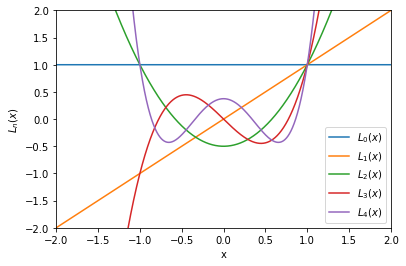

In [79]:
#1
def leg_fun1(x, n):
    tot = np.ones(x.size)
    ak = np.ones(x.size)
    for kk in range(1, int(n)+1):
        num = (n + kk)*(n - kk + 1)*(x - 1)
        denom = 2*(kk**2)
        ak *= (num/denom)
        tot += ak
    return tot

xvals = np.linspace(-2, 2, int(1e5))
yvals0 = leg_fun1(xvals, 0)
yvals1 = leg_fun1(xvals, 1)
yvals2 = leg_fun1(xvals, 2)
yvals3 = leg_fun1(xvals, 3)
yvals4 = leg_fun1(xvals, 4)

plt.plot(xvals, yvals0, label = "$L_{0}(x)$")
plt.plot(xvals, yvals1, label = "$L_{1}(x)$")
plt.plot(xvals, yvals2, label = "$L_{2}(x)$")
plt.plot(xvals, yvals3, label = "$L_{3}(x)$")
plt.plot(xvals, yvals4, label = "$L_{4}(x)$")

plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel("x")
plt.ylabel("$L_{n}(x)$")
plt.legend()

**Problem 2**: 5 pts - Using a for loop based approach, write a program which finds the function $f(n)$ where 

$$
f(n) = \frac{1}{n}\sum_{j=1}^{n} \left(\left(\frac{j}{n}\right)^{5} + 6\left(\frac{j}{n}\right)^{3} \right)
$$

for any positive integer n (2pts).  Generate a labeled plot of the results of your function for $1\leq n \leq 1000$, where $n$ will be on the $x$-axis, while the results of your function will appear on the $y$-axis.  Describe any trends you see from your graph. (3pts)      

In [80]:
#2
def func(n):
    tot = 0
    for jj in range(1, int(n) + 1):
        tot += (jj/n)**5 + 6*(jj/n)**3
    return tot/n
print(func(1000))

1.670168583333251


Text(0, 0.5, '$F_{1}(n)$')

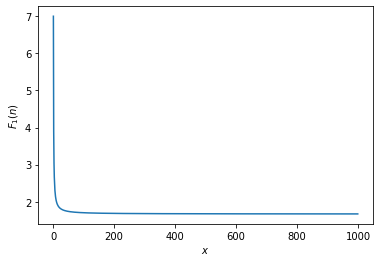

In [81]:
xvals = np.arange(1,1000)
yvals = [func(jj) for jj in xvals]

plt.plot(xvals, yvals)
plt.xlabel("$x$")
plt.ylabel("$F_{1}(n)$")

The function looks inversely related when comparing the y axis with the x axis. This is understandable since the series converges if we were to take the limit at infinity.

**Problem 3**: 6 pts- Using a vectorized approach, which means no explicit for loops, write a program which finds 

$$
f(n) = \frac{1}{n}\sum_{j=1}^{n} \left(\left(\frac{j}{n}\right)^{5} + 6\left(\frac{j}{n}\right)^{3} \right)
$$


for any positive integer n (3pts).  Using `time()`, run several different tests using different values of $n$ to determine how much faster your code is than that used in the previous problem.  For what value of $n$ do you finally see a significant difference in time?  Note, plots are far more preferable than just writing a particular number.  Build a case for your decision please. (3pts)    

In [82]:
#_Answer to Problem 3_

def func_vec(n):
    jvals = np.linspace(0,n,int(n)+1)
    j5 = (jvals/n)**5
    j3 = (jvals/n)**3
    tot = np.sum(j5 + 6*j3)
    return tot/n  

In [83]:
print(func_vec(1000))

1.67016858333325


In [84]:
start = time()
func(100000)
end = time()
print (end - start)

start = time()
func_vec(100000)
end = time()
print (end - start)

0.0431971549987793
0.010956048965454102


At about 100000 = n we see the vectorized function begin to be much faster than the regular for loop function. This comes after trial and error of plugging different values in the code

**Problem 4**: We can generalize the Fibonacci sequence so that we have the recurrence relationship

$$
p_{n} = p_{n-1} + ap_{n-2}, ~ a \in \mathbb{R}, ~ n\geq 2,
$$

where we start the sequence $p_{n}$ with the initial conditions

$$
p_{0} = s_{0}, ~ p_{1} = s_{1}, ~ s_{j} \in \mathbb{R}.
$$

4a) (3pts) Using the guess $p_{n} = \lambda^{n}$, show that you get two solutions for $\lambda$, say $\lambda_{\pm}$, where

$$
\lambda_{\pm} = \frac{1}{2}\left(1\pm\sqrt{1+4a} \right)
$$

4b) (3pts) Writing the general solution as 

$$
p_{n} = c_{+}\lambda_{+}^{n} + c_{-}\lambda_{-}^{n}
$$

show that when we take our initial conditions into account, we find that the constants $c_{+}$ and $c_{-}$ are given by 

$$
c_{+} = \frac{s_{1}-s_{0}\lambda_{-}}{\lambda_{+}-\lambda_{-}}, ~ c_{-} = \frac{s_{0}\lambda_{+}-s_{1}}{\lambda_{+}-\lambda_{-}}
$$

4c) (4pts) Let $a\geq -\frac{1}{4}$.  

- Find the range of $a$ such that 

$$ 
|\lambda_{+}|\leq 1, ~|\lambda_{-}| < 1
$$
    
- Find the range of $a$ such that 

$$ 
|\lambda_{+}|> 1, ~|\lambda_{-}| \leq 1
$$

- Find the range of $a$ such that 

$$ 
|\lambda_{+}|>1, ~|\lambda_{-}| > 1
$$

4a)
$$
p_{n} = \lambda^{n}\\
\lambda^{n} = \lambda^{n-1} + a\lambda^{n-2}\\
0 = -\lambda^{n} + \lambda^{n-1} + a\lambda^{n-2}\\
$$
Quadratic formula

$$
\lambda_{\pm} = \frac{1}{2}\left(1\pm\sqrt{1+4a} \right)
$$

where $\lambda_{+} = \frac{1}{2}\left(1+\sqrt{1+4a} \right)$
and $\lambda_{-} = \frac{1}{2}\left(1-\sqrt{1+4a} \right)$


4b)
$$
p_{n} = c_{+}\lambda_{+}^{n} + c_{-}\lambda_{-}^{n}\\
p_{0} = s_{0} = c_{+} + c_{-}\\
c_{+} = s_{0} - c_{-}\\
c_{-} = s_{0} - c_{+}\\
p_{1} = s_{1} = c_{+}\lambda_{+} + c_{-}\lambda_{-}\\
$$

substitute $s_{0} - c_{-}$ for $c_{+}$

$$
s_{1} = (s_{0} - c_{-})\lambda_{+} + c_{-}\lambda_{-}\\
s_{1} = s_{0}\lambda - c_{-}\lambda_{+} + c_{-}\lambda_{-}\\
s_{1} - s_{0}\lambda = c_{-}(\lambda_{-} - \lambda_{+})\\
\frac {s_{1} - s_{0}\lambda}{\lambda_{-} - \lambda_{+}} = c_{-}\\
\frac {-1(-s_{1} + s_{0}\lambda)}{-1(-\lambda_{-} + \lambda_{+}} = c_{-}\\
\frac {s_{0}\lambda - s_{1}}{\lambda_{+} - \lambda_{-}} = c_{-}\\
$$

substitute $s_{0} - c_{+}$ for $c_{-}$

$$
s_{1} = c_{+}\lambda_{+} + (s_{0}-c_{+})\lambda_{-}\\
s_{1} = c_{+}\lambda_{+} + s_{0}\lambda_{-} - c_{+}\lambda_{-}\\
s_{1} - s_{0}\lambda_{-} = c_{+}\lambda_{+} - c_{+}\lambda_{-}\\
s_{1} - s_{0}\lambda_{-} = c_{+}(\lambda_{+} - \lambda_{-})\\
\frac{s_{1} - s_{0}\lambda_{-}}{\lambda_{+} - \lambda_{-}} = c_{+}\\
$$

4c)

$$ 
|\lambda_{+}|\leq 1, ~|\lambda_{-}| < 1 \\
\frac{-1}{4} < a \leq 2 \\
$$

$$ 
|\lambda_{+}|> 1, ~|\lambda_{-}| \leq 1 \\
0 < a \\
$$

$$ 
|\lambda_{+}|>1, ~|\lambda_{-}| > 1 \\
0 < a \\
$$

**Problem 5**: Now let us numerically explore the results from Problem 4.  

5a) (3pts) Using the skeleton-code below write a function `fib_general` which generates, for given integer value $n\geq 2$ and real values `a`, `s0`, and `s1`, the $n+1$ array of points `pn` such that 

`
pn[0] = s0, pn[1] = s1
`

and the entries in `pn` are given by the recurrence relationship from Problem 4.  

5b) (3pts) Fixing $n=10$, $s_{0}=1$, $s_{1}=1$, using your results from Problem 4c, choose three values of $a$, one each from the three different ranges of values of $a$, and generate a plot of $p_{n}$ for each.  Make sure axes are appropriately labeled.  Explain how the plot confirms the results you found in Problem 4c.  

5c) (2pts) Fixing $n=10$, $s_{0}=1$, $s_{1}=1$, choose $a=-1/2$ and generate a plot of $p_{n}$.  Briefly explain the results you see and how they differ from those in Problem 5b).  

In [85]:
#5a
def fib_general(n, s0, s1):
    pn = np.array(range(n)) # same as np.arange(n)
    pn[0] = s0
    pn[1] = s1
    for jj in range(2, n):
        pn[jj] = pn[jj-2] + pn[jj-1]
    return pn

In [86]:
#5b
n = 10
s0 = 1
s1 = 1

print(fib_general(n,s0,s1))

[ 1  1  2  3  5  8 13 21 34 55]


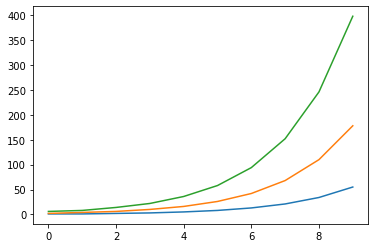

In [87]:
yvals1 = fib_general(n, s0, s1)
yvals2 = fib_general(n, 2, 4)
yvals3 = fib_general(n, 6, 8)
plt.plot(yvals1)
plt.plot(yvals2)
plt.plot(yvals3)